In [1]:
import sympy as sym

import numpy as np

import repeated_play

In [2]:
import itertools 

In [3]:
from tqdm.notebook import tqdm

In [4]:
sym.init_printing(True)

In [5]:
b, c = sym.symbols("b, c")

**Functions**

In [6]:
def trnsf_transition_m_memory_two(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    else:
        M = np.array([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    
    
    return M

In [7]:
def trnsf_transition_m_memory_three(player, analytical=True):
    
    if analytical == False:
    
        return np.array([[coplayer[0], (1 - coplayer[0]), 0, 0, 0, 0, 0, 0],
                        [0, 0, coplayer[1], (1 - coplayer[1]), 0, 0, 0, 0],
                        [0, 0, 0, 0, coplayer[2], (1 - coplayer[2]), 0, 0],
                        [0, 0, 0, 0, 0, 0, coplayer[3], (1 - coplayer[3])],
                        [coplayer[4], (1 - coplayer[4]), 0, 0, 0, 0, 0, 0],
                        [0, 0, coplayer[5], (1 - coplayer[5]), 0, 0, 0, 0],
                        [0, 0, 0, 0, coplayer[6], (1 - coplayer[6]), 0, 0],
                        [0, 0, 0, 0, 0, 0, coplayer[7], (1 - coplayer[7])]])
    
    if analytical == True:

        return sym.Matrix([[coplayer[0], (1 - coplayer[0]), 0, 0, 0, 0, 0, 0],
                        [0, 0, coplayer[1], (1 - coplayer[1]), 0, 0, 0, 0],
                        [0, 0, 0, 0, coplayer[2], (1 - coplayer[2]), 0, 0],
                        [0, 0, 0, 0, 0, 0, coplayer[3], (1 - coplayer[3])],
                        [coplayer[4], (1 - coplayer[4]), 0, 0, 0, 0, 0, 0],
                        [0, 0, coplayer[5], (1 - coplayer[5]), 0, 0, 0, 0],
                        [0, 0, 0, 0, coplayer[6], (1 - coplayer[6]), 0, 0],
                        [0, 0, 0, 0, 0, 0, coplayer[7], (1 - coplayer[7])]])

### $n=1$ case

How many pure self-reactive strategies? 4?

In [30]:
pd, epsilon = sym.symbols(r"p_D, \epsilon")

In [31]:
pure_strategies = list(itertools.product([0, 1], repeat=2))

In [32]:
strategy = [1 * (1 - epsilon) + 0 * epsilon, pd * (1 - epsilon) + (1 - pd) * epsilon]

In [33]:
M = repeated_play.transition_matrix_repeated_game(strategy * 2, strategy * 2, memory='one', analytical=True)

In [34]:
ss = repeated_play.stationary_distribution(M, analytical=True)

In [37]:
strategy_payoff = sum(ss @ np.array([b - c, -c, b, 0]))

In [38]:
strategy_payoff = strategy_payoff.factor()

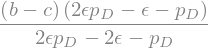

In [87]:
strategy_payoff

### ALLC and TFT

In [93]:
from sympy.solvers.inequalities import reduce_rational_inequalities

In [94]:
tft = pure_strategies[2] * 2
print(tft)

tft_error = [i * (1 - epsilon) + (1 - i) * epsilon for i in tft]

M = repeated_play.transition_matrix_repeated_game(tft_error, strategy * 2, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

# tft_condition = sym.solve(sum(ss @ np.array([b - c, -c, b, 0])) - (b - c), pd)[0].collect(b).collect(c)

(1, 0, 1, 0)


In [95]:
tft_payoff = sum(ss @ np.array([b - c, -c, b, 0]))

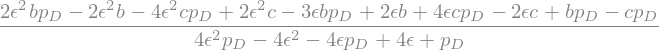

In [96]:
tft_payoff.factor()

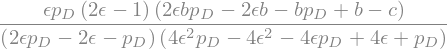

In [97]:
expr = (strategy_payoff - tft_payoff).factor()

expr

In [98]:
sols = sym.solve((tft_payoff - strategy_payoff).factor(), pd)

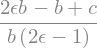

In [99]:
sols[1]

In [100]:
sols[1].subs({epsilon:0.01, b:1, c:0.3})

In [102]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.693877551020408})

In [103]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.593877551020408})

In [104]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.793877551020408})

In [105]:
allc = pure_strategies[3] * 2

allc_error = [i * (1 - epsilon) + (1 - i) * epsilon for i in allc]

M = repeated_play.transition_matrix_repeated_game(allc_error, strategy * 2, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

allc_payoff = sum(ss @ np.array([b - c, -c, b, 0]))

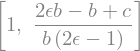

In [106]:
sols = sym.solve((strategy_payoff - allc_payoff).factor(), pd)
sols

In [107]:
expr = strategy_payoff - allc_payoff

In [108]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.793877551020408})

In [109]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.693877551020408})

In [110]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.593877551020408})

### ALLD

In [111]:
alld = pure_strategies[0] * 2

alld_error = [i * (1 - epsilon) + (1 - i) * epsilon for i in alld]

M = repeated_play.transition_matrix_repeated_game(alld_error, strategy * 2, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

alld_payoff = sum(ss @ np.array([b - c, -c, b, 0]))

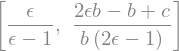

In [114]:
sym.solve((strategy_payoff - alld_payoff).factor(), pd)

In [115]:
expr = (strategy_payoff - alld_payoff).factor()

In [116]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.793877551020408})

In [117]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.693877551020408})

In [118]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.593877551020408})

### Anti TFT

In [119]:
anti = pure_strategies[1] * 2

anti_error = [i * (1 - epsilon) + (1 - i) * epsilon for i in anti]

M = repeated_play.transition_matrix_repeated_game(anti_error, strategy * 2, memory='one', analytical=True)

ss = repeated_play.stationary_distribution(M, analytical=True)

anti_payoff = sum(ss @ np.array([b - c, -c, b, 0]))

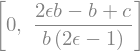

In [120]:
sym.solve((strategy_payoff - anti_payoff).factor(), pd)

In [121]:
expr = (strategy_payoff - anti_payoff).factor()

In [122]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.793877551020408})

In [123]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.693877551020408})

In [124]:
expr.subs({epsilon:0.01, b:1, c:0.3, pd: 0.593877551020408})

In [130]:
written = 1 + c / (b * (2 * epsilon - 1))

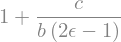

In [131]:
written

In [132]:
(sols[1] - written).factor()

### $n=2$ case

In [349]:
pcc, pcd, pdc, pdd = sym.symbols("p_{CC}, p_{CD}, p_{DC}, p_{DD}")

In [350]:
pure_strategies = list(itertools.product([0, 1], repeat=4))

In [329]:
len(pure_strategies)

In [330]:
strategy = [1 * (1 - epsilon) + 0 * epsilon,
            pcd * (1 - epsilon) + (1 - pcd) * epsilon,
            1 * (1 - epsilon) + 0 * epsilon,
            pcd * (1 - epsilon) + (1 - pcd) * epsilon,
            pdc * (1 - epsilon) + (1 - pdc) * epsilon,
            pdd * (1 - epsilon) + (1 - pdd) * epsilon,
            pdc * (1 - epsilon) + (1 - pdc) * epsilon,
            pdd * (1 - epsilon) + (1 - pdd) * epsilon]

In [331]:
strategy = strategy * 2

In [351]:
strategy = [pcc, pcd, pcc, pcd, pdc, pdd, pdc, pdd] * 2

In [352]:
M = repeated_play.transition_matrix_repeated_game(strategy,
                                                  strategy,
                                                  memory='two',
                                                  analytical=True)

In [354]:
M_copy = sym.Matrix([i.factor() for i in M])

In [355]:
M = M_copy.reshape(16, 16)

In [358]:
ss = repeated_play.stationary_distribution(M, analytical=True)

KeyboardInterrupt: 

In [340]:
U = sym.ones(16, 16)

In [348]:
M[0].expand().coeff(epsilon ** 2)

In [37]:
strategy_payoff = sum(ss @ np.array([b - c, -c, b, 0]))

In [38]:
strategy_payoff = strategy_payoff.factor()

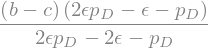

In [87]:
strategy_payoff

In [168]:
payoffs = []

for num, coplayer in tqdm(enumerate(pure_strategies)):
    
    coplayer_error = [i * (1 - epsilon) + (1 - i) * epsilon for i in coplayer]
    
    M = trnsf_transition_m_memory_two(coplayer_error)

    ss = repeated_play.stationary_distribution(M, analytical=True)

    rho_q = ss[0] + ss[1]

    rho_p = sum([ss[i] * p for i, p in enumerate(strategy)])


    payoff_q = (rho_p * b - c * rho_q)

    payoffs.append((num, sym.nsimplify(payoff_q)))

0it [00:00, ?it/s]

In [169]:
expanded_payoffs = [(p[1] - (b - c)).expand() for p in payoffs]

In [170]:
len(expanded_payoffs)

In [171]:
hrt = list(set(expanded_payoffs))

### Condition 1

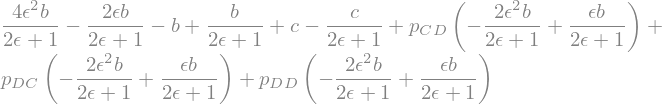

In [194]:
hrt[0].collect(pcd).collect(pdc).collect(pdd)

In [196]:
coeff = (-2 * epsilon ** 2 * b + epsilon * b) / (2 * epsilon + 1)

written = (pcd + pdc + pdd) * coeff + 2 * epsilon * (2 * epsilon * b - 2 * b + c) / (2 * epsilon + 1)

In [197]:
(written - hrt[0].collect(pcd).collect(pdc).collect(pdd)).factor()

### Condition 2

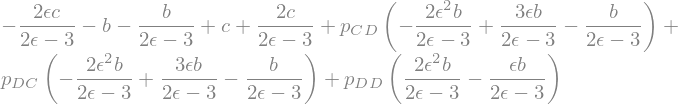

In [215]:
hrt[1].collect(pcd).collect(pdc).collect(pdd)

In [207]:
coeff1 = hrt[1].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[1].collect(pcd).collect(pdc).coeff(pdd).factor()

In [214]:
remainers = (hrt[1].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

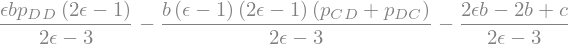

In [216]:
written = (pcd + pdc) * coeff1 + pdd * coeff2 + remainers
written

In [218]:
(hrt[1].collect(pcd).collect(pdc).collect(pdd) - written).factor()

### Condition 3

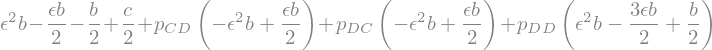

In [219]:
hrt[2].collect(pcd).collect(pdc).collect(pdd)

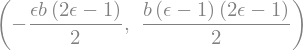

In [229]:
coeff1 = hrt[2].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[2].collect(pcd).collect(pdc).coeff(pdd).factor()

coeff1, coeff2

In [228]:
remainer = (hrt[2].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor().collect(b)

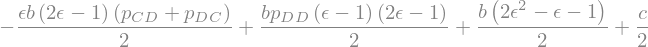

In [230]:
written = (pcd + pdc) * coeff1 + pdd * coeff2 + remainer
written

In [231]:
(hrt[2].collect(pcd).collect(pdc).collect(pdd) - written).factor()

### Condition 4

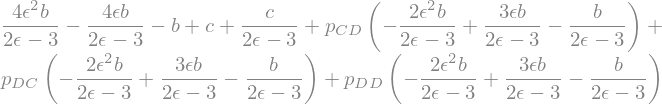

In [232]:
hrt[3].collect(pcd).collect(pdc).collect(pdd)

In [236]:
coeff = hrt[3].collect(pcd).collect(pdc).coeff(pcd).factor()

In [242]:
remainer = (hrt[3].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc + pdd) * coeff).factor()

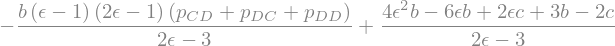

In [243]:
written = (pcd + pdc + pdd) * coeff + remainer
written

In [244]:
(hrt[3].collect(pcd).collect(pdc).collect(pdd) - written).factor()

### Condition 5

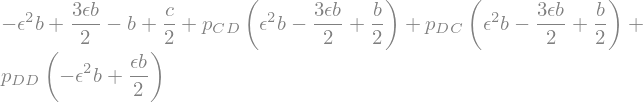

In [177]:
hrt[4].collect(pcd).collect(pdc).collect(pdd)

In [250]:
coeff = hrt[4].collect(pcd).collect(pdc).coeff(pcd).factor()

In [252]:
remainer = (hrt[4].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc + pdd) * coeff).factor()

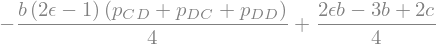

In [254]:
written = (pcd + pdc + pdd) * coeff + remainer
written

In [255]:
(hrt[4].collect(pcd).collect(pdc).collect(pdd) - written).factor()

### Condition 6

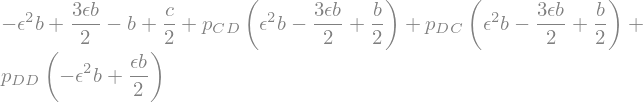

In [256]:
hrt[5].collect(pcd).collect(pdc).collect(pdd)

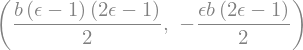

In [258]:
coeff1 = hrt[5].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[5].collect(pcd).collect(pdc).coeff(pdd).factor()

coeff1, coeff2

In [261]:
remainer = (hrt[5].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

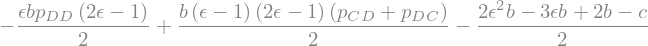

In [263]:
written = (pcd + pdc) * coeff1 + pdd * coeff2 + remainer
written

In [264]:
(hrt[5].collect(pcd).collect(pdc).collect(pdd) - written).factor()

### Condition 7

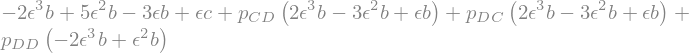

In [269]:
hrt[6].collect(pcd).collect(pdc).collect(pdd)

In [270]:
coeff1 = hrt[6].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[6].collect(pcd).collect(pdc).coeff(pdd).factor()

coeff1, coeff2

In [271]:
remainer = (hrt[6].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

In [272]:
written = (pcd + pdc) * coeff1 + pdd * coeff2 + remainer
written

In [273]:
(hrt[6].collect(pcd).collect(pdc).collect(pdd) - written).factor()

### Condition 8

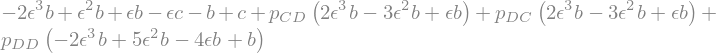

In [274]:
hrt[7].collect(pcd).collect(pdc).collect(pdd)

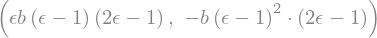

In [275]:
coeff1 = hrt[7].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[7].collect(pcd).collect(pdc).coeff(pdd).factor()

coeff1, coeff2

In [276]:
remainer = (hrt[7].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

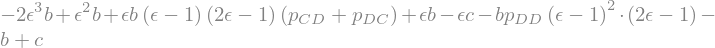

In [277]:
written = (pcd + pdc) * coeff1 + pdd * coeff2 + remainer
written

In [278]:
(hrt[7].collect(pcd).collect(pdc).collect(pdd) - written).factor()

### Condition 9

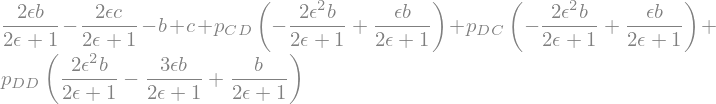

In [279]:
hrt[8].collect(pcd).collect(pdc).collect(pdd)

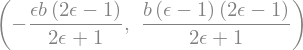

In [280]:
coeff1 = hrt[8].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[8].collect(pcd).collect(pdc).coeff(pdd).factor()

coeff1, coeff2

In [281]:
remainer = (hrt[8].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

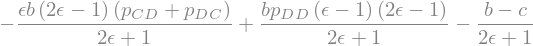

In [282]:
written = (pcd + pdc) * coeff1 + pdd * coeff2 + remainer
written

In [283]:
(hrt[8].collect(pcd).collect(pdc).collect(pdd) - written).factor()

### Grouping Conditions 1

In [284]:
coeff = (-2 * epsilon ** 2 * b + epsilon * b) / (2 * epsilon + 1)

condition1 = (pcd + pdc + pdd) * coeff + 2 * epsilon * (2 * epsilon * b - 2 * b + c) / (2 * epsilon + 1)

In [289]:
coeff = hrt[3].collect(pcd).collect(pdc).coeff(pcd).factor()
remainer = (hrt[3].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc + pdd) * coeff).factor()

condition4 = (pcd + pdc + pdd) * coeff + remainer

In [290]:
coeff = hrt[4].collect(pcd).collect(pdc).coeff(pcd).factor()
remainer = (hrt[4].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc + pdd) * coeff).factor()
condition5 = (pcd + pdc + pdd) * coeff + remainer

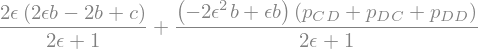

In [291]:
condition1

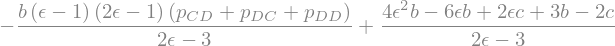

In [292]:
condition4

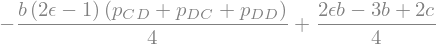

In [293]:
condition5

In [317]:
X = sym.solve(condition1, pcd + pdc + pdd)[0]

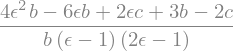

In [305]:
sym.solve(condition4, pcd + pdc + pdd)[0].factor()

In [318]:
Y = sym.solve(condition5, pcd + pdc + pdd)[0]

In [320]:
(X - Y).factor()

### Grouping Conditions 2

In [321]:
coeff1 = hrt[1].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[1].collect(pcd).collect(pdc).coeff(pdd).factor()

remainers = (hrt[1].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

condition2 = (pcd + pdc) * coeff1 + pdd * coeff2 + remainers

In [322]:
coeff1 = hrt[2].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[2].collect(pcd).collect(pdc).coeff(pdd).factor()

remainers = (hrt[2].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

condition3 = (pcd + pdc) * coeff1 + pdd * coeff2 + remainers

In [323]:
coeff1 = hrt[5].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[5].collect(pcd).collect(pdc).coeff(pdd).factor()
remainer = (hrt[5].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

condition6 = (pcd + pdc) * coeff1 + pdd * coeff2 + remainers

In [324]:
coeff1 = hrt[6].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[6].collect(pcd).collect(pdc).coeff(pdd).factor()
remainer = (hrt[6].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

condition7 = (pcd + pdc) * coeff1 + pdd * coeff2 + remainers

In [325]:
coeff1 = hrt[7].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[7].collect(pcd).collect(pdc).coeff(pdd).factor()
remainer = (hrt[7].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

condition8 = (pcd + pdc) * coeff1 + pdd * coeff2 + remainers

In [326]:
coeff1 = hrt[8].collect(pcd).collect(pdc).coeff(pcd).factor()
coeff2 = hrt[8].collect(pcd).collect(pdc).coeff(pdd).factor()
remainer = (hrt[8].collect(pcd).collect(pdc).collect(pdd) - (pcd + pdc) * coeff1 - pdd * coeff2).factor()

condition9 = (pcd + pdc) * coeff1 + pdd * coeff2 + remainers

In [336]:
group_conditions = [condition2, condition3, condition6, condition7, condition8, condition9]

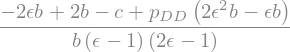

In [353]:
sym.solve(condition2, pcd + pdc)[0].expand().factor().collect(pdd)

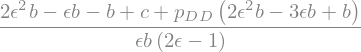

In [354]:
sym.solve(condition3, pcd + pdc)[0].expand().factor().collect(pdd)

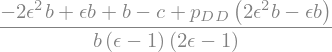

In [355]:
sym.solve(condition6, pcd + pdc)[0].expand().factor().collect(pdd)

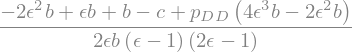

In [356]:
sym.solve(condition7, pcd + pdc)[0].expand().factor().collect(pdd)

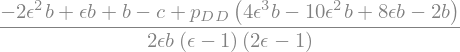

In [357]:
sym.solve(condition8, pcd + pdc)[0].expand().factor().collect(pdd)

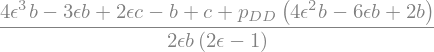

In [358]:
sym.solve(condition9, pcd + pdc)[0].expand().factor().collect(pdd)

In [378]:
[10 ** - i for i in np.linspace(1, 4, 4)]

In [385]:
np.linspace(0.001, 0.1, 11)

array([0.001 , 0.0109, 0.0208, 0.0307, 0.0406, 0.0505, 0.0604, 0.0703,
       0.0802, 0.0901, 0.1   ])

In [386]:
0.001

### $n=3$

In [92]:
pccd, pcdc, pcdd, pdcc, pdcd, pddc, pddd =  sym.symbols("p_{CCD}, p_{CDC}, p_{CDD}, p_{DCC}, p_{DCD}, p_{DDC}, p_{DDD}")

In [95]:
player = [1, pccd, 1, pccd, pcdc, pcdd, pcdc, pcdd,
          1, pccd, 1, pccd, pcdc, pcdd, pcdc, pcdd,
          pdcc, pdcd, pdcc, pdcd, pddc, pddd, pddc, pddd,
          pdcc, pdcd, pdcc, pdcd, pddc, pddd, pddc, pddd]

In [96]:
len(player)

In [99]:
2 ** 3

In [100]:
for i in [-5.0000, -4.5000, -4.0000, -3.5000]:
    print(10 ** i)

1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794


In [102]:
10 ** - 1

In [108]:
for i in np.arange(-5, -0.5, 0.5):
    print(10 ** i)

1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1


In [110]:
len(np.arange(-5, -0.5, 0.5))

In [319]:
pc, pd = sym.symbols("p_C, p_D")

qc, qd = sym.symbols("q_C, q_D")

In [324]:
M = repeated_play.transition_matrix_repeated_game( [qc, qd, qc, qd],[pc, pd, pc, pd],memory="one",
                                                  analytical=True)

In [325]:
ss = repeated_play.stationary_distribution(M, analytical=True)

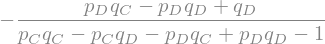

In [326]:
(ss[0] + ss[1]).factor()

In [207]:
payoff2 = sum(ss @ np.array([b - c, -c, b, 0])).factor()

In [200]:
Q = sym.Matrix([[qc, (1 - qc)],
                [qd, (1 - qd)]])

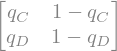

In [201]:
Q

In [202]:
ss2 = repeated_play.stationary_distribution(Q, analytical=True)

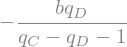

In [205]:
b * ss2[0] 

In [206]:
payoff1 = (b * ss2[0] - (ss2[0] * pc + ss2[1] * pd) * c).factor()

In [213]:
payoff1.subs({b:1, c:0.3, pc:0, pd:0, qc:0, qd:0})

In [214]:
payoff2.subs({b:1, c:0.3, pc:0, pd:0, qc:0, qd:0})

In [309]:
np.random.seed(0)

player = np.random.random(2)
playerm = [player[0], player[1]] * 2

coplayer = np.random.random(2)
coplayerm = [coplayer[0], coplayer[1]] * 2

In [310]:
M = repeated_play.transition_matrix_repeated_game(coplayerm,
                                                  playerm,
                                                  memory="one")

ss = repeated_play.stationary_distribution(M)[0]

In [311]:
ss[0] + ss[1]

In [312]:
ss @ np.array([bval - cval, -cval, bval, 0])

In [313]:
Q = np.array([[coplayer[0], (1 - coplayer[0])],
              [coplayer[1], (1 - coplayer[1])]])

Z = np.array([[player[0], (1 - player[0])],
              [player[1], (1 - player[1])]])

In [314]:
Q

array([[0.60276338, 0.39723662],
       [0.54488318, 0.45511682]])

In [315]:
ss1 = repeated_play.stationary_distribution(Q)[0]
ss1

array([0.5783587, 0.4216413])

In [316]:
ss1[0] * ss2[0]

In [317]:
ss2 = repeated_play.stationary_distribution(Z)[0]

In [318]:
ss2

array([0.6131723, 0.3868277])

In [262]:
bval = 1
cval = 0.3

for i in range(10 ** 3):
    np.random.seed(i + 20)
    
    player = np.random.random(2)
    playerm = [player[0], player[1]] * 2
    
    coplayer = np.random.random(2)
    coplayerm = [coplayer[0], coplayer[1]] * 2
    
    
    M = repeated_play.transition_matrix_repeated_game(playerm,
                                                      coplayerm,
                                                      memory="one")
    
    ss = repeated_play.stationary_distribution(M)[0]
    print(ss)
    
    payoff_expr_one = ss @ np.array([bval - cval, -cval, bval, 0])
    
    Q = np.array([[coplayer[0], (1 - coplayer[0])],
                  [coplayer[1], (1 - coplayer[1])]])
    
    ss2 = repeated_play.stationary_distribution(Q)[0]
    
    
    payoff_expr_two = bval * ss2[0] - (ss2[0] * player[0] + ss2[1] * player[1]) * cval
    
    assert np.isclose(payoff_expr_one, payoff_expr_two)

[0.54435983 0.08601281 0.31919261 0.05043475]


AssertionError: 

In [263]:
payoff_expr_one, payoff_expr_two